# 第八章-多项式回归与模型泛化

## 8-1 什么是多项式回归

![](picture/8-1-1.png)

![](picture/8-1-2.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(100, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

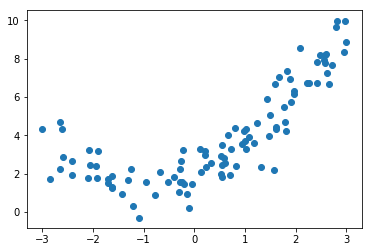

In [5]:
plt.scatter(x, y)
plt.show()

**使用线性回归**

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

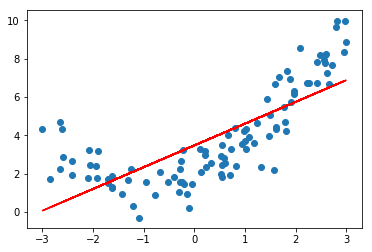

In [9]:
plt.scatter(x, y)
plt.plot(x, y_predict, color="r")
plt.show()

使用线性回归不能很好的拟合样本数据

**解决方案, 添加一个特征**

In [10]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [14]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

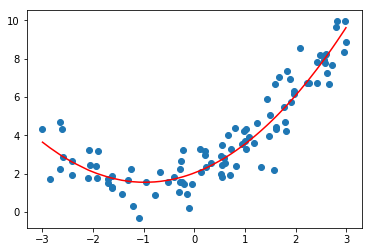

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")
plt.show()

In [18]:
lin_reg2.coef_

array([0.99938322, 0.51233098])

In [19]:
lin_reg2.intercept_

2.04292853122732

## 8-2 `scikit-learn` 中的多项式回归于 `pipeline`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(100, 3)

In [16]:
X[:5, :]

array([[ 1.35532171],
       [ 0.39163791],
       [-2.36469644],
       [-0.79809138],
       [-0.87000521]])

In [17]:
X2[:5, :]

array([[ 1.        ,  1.35532171,  1.83689695],
       [ 1.        ,  0.39163791,  0.15338026],
       [ 1.        , -2.36469644,  5.59178927],
       [ 1.        , -0.79809138,  0.63694985],
       [ 1.        , -0.87000521,  0.75690906]])

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

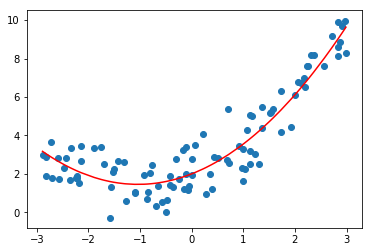

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")
plt.show()

In [21]:
lin_reg2.coef_

array([0.        , 1.04830624, 0.50327085])

In [22]:
lin_reg2.intercept_

2.003180752852513

**关于PolynomialFeatures**

In [23]:
X = np.arange(1, 11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2.shape

(5, 6)

In [27]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

**`Pipline`**

In [42]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)), 
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [44]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

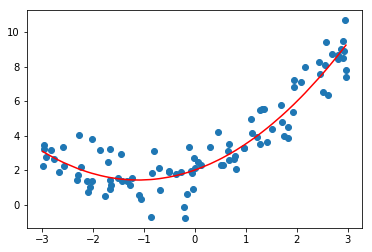

In [45]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()

## 8-3 过拟合与欠拟合

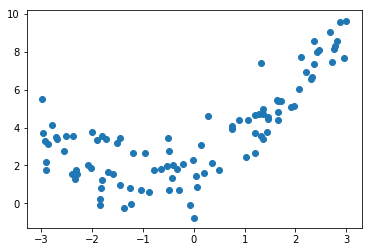

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

**使用线性回归**

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

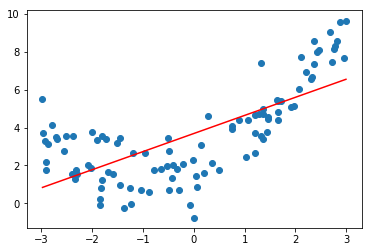

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

**使用多项式回归**

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [8]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [9]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

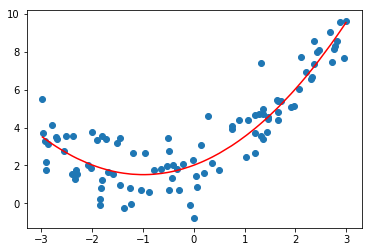

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [11]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376415

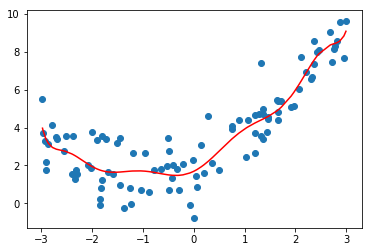

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [13]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6790491640936147

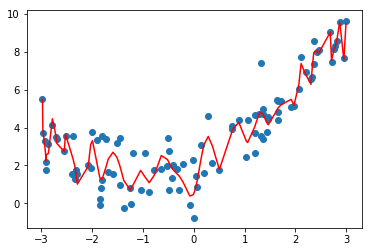

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [15]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

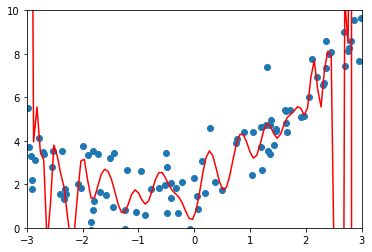

In [16]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

## 8-4 为什么要训练数据集与测试数据集

**train test split的意义**

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 8-4-1 使用线性回归进行训练

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)    # 根据 X_train, y_train 训练模型
y_predict = lin_reg.predict(X_test)  # 使用训练模型对测试数据集X_test进行预测
mean_squared_error(y_test, y_predict)  # 求预测结果与测试集的均方误差

2.2199965269396573

### 8-4-2 使用多项式回归进行训练

In [42]:
poly2_reg = PolynomialRegression(degree=2)  # 使用二项式进行训练
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297902

**当使用二项式进行训练得到训练模型均方误差最小, 泛化能力最强**

In [43]:
poly10_reg = PolynomialRegression(degree=10)  # 使用10项式
poly10_reg.fit(X_train, y_train)           
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150725

In [44]:
poly100_reg = PolynomialRegression(degree=100)  # 使用100项式
poly100_reg.fit(X_train, y_train)        
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

10594454958.621588

## 8-5 学习曲线

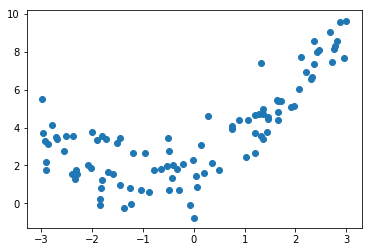

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [47]:
X_train.shape

(75, 1)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

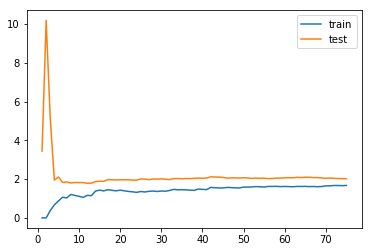

In [49]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

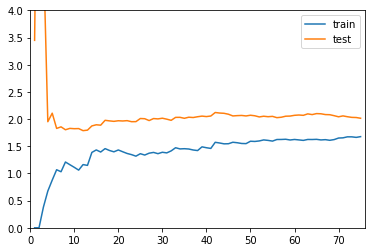

In [50]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

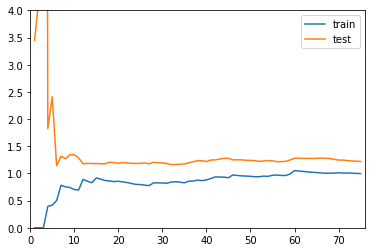

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

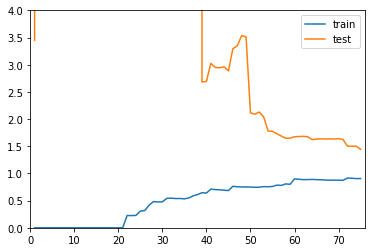

In [52]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

## 8-6 验证数据集与交叉验证

![](picture/8-4-1.png)

![](picture/8-4-2.png)

![](picture/8-4-3.png)

![](picture/8-4-4.png)
由于验证数据集是随机的, 其中可能存在不合常规的数据, 当验证时也会对训练模型产生影响

![](picture/8-4-5.png)

使用交叉验证`(Cross Validation)`, 将 `K` 个模型的均值作为结果进行调参, 有效的避免了当其中一个模型有异常时产生较大的误差.

#### `Validation` 和 `Cross Validation`

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

#### 测试 `train_test_split`

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


In [5]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=3, p=4)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.9860917941585535

#### 使用交叉验证

In [6]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3)

array([0.98895028, 0.97777778, 0.96629213])

`cross_val_score` 默认将传递的`X_train`分成三分进行交叉验证, 并返回每一个的模型对应的准确率

In [7]:
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train, cv = 3)  # 使用交叉验证
        score = np.mean(scores)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 2
Best Score = 0.9823599874006478


`train_test_split` 对比 交叉验证:  
1. 可以看处得到的两次 `Best K` 与 `Best P` 值不同, 此时相对来多交叉验证得到的 `K`与`P` 更具有价值, 因为使用`train_test_split`得到的结果可能是模型过拟合了从`train_test_split`分离出来的测试数据集而已.
2. 交叉验证得到的 `Best Score` 值虽然比 `train_test_split` 稍微低一些, 但是交叉验证通常不会过拟合分离出来的某一组数据, 所以通常来将分数会稍微低一些.

In [8]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

### 回顾网格搜索

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(2, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [12]:
grid_search.best_score_

0.9823747680890538

In [13]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [14]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

### cv参数

In [15]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99543379, 0.96803653, 0.98148148, 0.96261682, 0.97619048])

In [17]:
grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)
print(grid_search)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)


![](picture/8-6-1.png)

![](picture/8-6-2.png)

## 8-7 偏差方差平衡

![](picture/8-7-1.png)

![](picture/8-7-2.png)

![](picture/8-7-3.png)

![](picture/8-7-4.png)

![](picture/8-7-5.png)

## 8-8 模型泛化与岭回归

## 8-9 LASSO

## 8-10 L1,L2和弹性网络